In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt



In [40]:
iris = pd.read_csv("iris.csv")

In [41]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [42]:
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [43]:
iris.shape

(150, 5)

In [44]:
iris.describe

<bound method NDFrame.describe of      sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[150 rows x 5 columns]>

In [45]:
iris.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [46]:
iris.drop_duplicates()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [47]:
x = iris.iloc[:,:3].values
y = iris.iloc[:,:3].values
z = iris.iloc[:,4:5].values
print(x)

[[5.1 3.5 1.4]
 [4.9 3.  1.4]
 [4.7 3.2 1.3]
 [4.6 3.1 1.5]
 [5.  3.6 1.4]
 [5.4 3.9 1.7]
 [4.6 3.4 1.4]
 [5.  3.4 1.5]
 [4.4 2.9 1.4]
 [4.9 3.1 1.5]
 [5.4 3.7 1.5]
 [4.8 3.4 1.6]
 [4.8 3.  1.4]
 [4.3 3.  1.1]
 [5.8 4.  1.2]
 [5.7 4.4 1.5]
 [5.4 3.9 1.3]
 [5.1 3.5 1.4]
 [5.7 3.8 1.7]
 [5.1 3.8 1.5]
 [5.4 3.4 1.7]
 [5.1 3.7 1.5]
 [4.6 3.6 1. ]
 [5.1 3.3 1.7]
 [4.8 3.4 1.9]
 [5.  3.  1.6]
 [5.  3.4 1.6]
 [5.2 3.5 1.5]
 [5.2 3.4 1.4]
 [4.7 3.2 1.6]
 [4.8 3.1 1.6]
 [5.4 3.4 1.5]
 [5.2 4.1 1.5]
 [5.5 4.2 1.4]
 [4.9 3.1 1.5]
 [5.  3.2 1.2]
 [5.5 3.5 1.3]
 [4.9 3.6 1.4]
 [4.4 3.  1.3]
 [5.1 3.4 1.5]
 [5.  3.5 1.3]
 [4.5 2.3 1.3]
 [4.4 3.2 1.3]
 [5.  3.5 1.6]
 [5.1 3.8 1.9]
 [4.8 3.  1.4]
 [5.1 3.8 1.6]
 [4.6 3.2 1.4]
 [5.3 3.7 1.5]
 [5.  3.3 1.4]
 [7.  3.2 4.7]
 [6.4 3.2 4.5]
 [6.9 3.1 4.9]
 [5.5 2.3 4. ]
 [6.5 2.8 4.6]
 [5.7 2.8 4.5]
 [6.3 3.3 4.7]
 [4.9 2.4 3.3]
 [6.6 2.9 4.6]
 [5.2 2.7 3.9]
 [5.  2.  3.5]
 [5.9 3.  4.2]
 [6.  2.2 4. ]
 [6.1 2.9 4.7]
 [5.6 2.9 3.6]
 [6.7 3.1 4.4]
 [5.6 3.  

In [48]:
print(y)

[[5.1 3.5 1.4]
 [4.9 3.  1.4]
 [4.7 3.2 1.3]
 [4.6 3.1 1.5]
 [5.  3.6 1.4]
 [5.4 3.9 1.7]
 [4.6 3.4 1.4]
 [5.  3.4 1.5]
 [4.4 2.9 1.4]
 [4.9 3.1 1.5]
 [5.4 3.7 1.5]
 [4.8 3.4 1.6]
 [4.8 3.  1.4]
 [4.3 3.  1.1]
 [5.8 4.  1.2]
 [5.7 4.4 1.5]
 [5.4 3.9 1.3]
 [5.1 3.5 1.4]
 [5.7 3.8 1.7]
 [5.1 3.8 1.5]
 [5.4 3.4 1.7]
 [5.1 3.7 1.5]
 [4.6 3.6 1. ]
 [5.1 3.3 1.7]
 [4.8 3.4 1.9]
 [5.  3.  1.6]
 [5.  3.4 1.6]
 [5.2 3.5 1.5]
 [5.2 3.4 1.4]
 [4.7 3.2 1.6]
 [4.8 3.1 1.6]
 [5.4 3.4 1.5]
 [5.2 4.1 1.5]
 [5.5 4.2 1.4]
 [4.9 3.1 1.5]
 [5.  3.2 1.2]
 [5.5 3.5 1.3]
 [4.9 3.6 1.4]
 [4.4 3.  1.3]
 [5.1 3.4 1.5]
 [5.  3.5 1.3]
 [4.5 2.3 1.3]
 [4.4 3.2 1.3]
 [5.  3.5 1.6]
 [5.1 3.8 1.9]
 [4.8 3.  1.4]
 [5.1 3.8 1.6]
 [4.6 3.2 1.4]
 [5.3 3.7 1.5]
 [5.  3.3 1.4]
 [7.  3.2 4.7]
 [6.4 3.2 4.5]
 [6.9 3.1 4.9]
 [5.5 2.3 4. ]
 [6.5 2.8 4.6]
 [5.7 2.8 4.5]
 [6.3 3.3 4.7]
 [4.9 2.4 3.3]
 [6.6 2.9 4.6]
 [5.2 2.7 3.9]
 [5.  2.  3.5]
 [5.9 3.  4.2]
 [6.  2.2 4. ]
 [6.1 2.9 4.7]
 [5.6 2.9 3.6]
 [6.7 3.1 4.4]
 [5.6 3.  

In [49]:
print(z)

[['Setosa']
 ['Setosa']
 ['Setosa']
 ['Setosa']
 ['Setosa']
 ['Setosa']
 ['Setosa']
 ['Setosa']
 ['Setosa']
 ['Setosa']
 ['Setosa']
 ['Setosa']
 ['Setosa']
 ['Setosa']
 ['Setosa']
 ['Setosa']
 ['Setosa']
 ['Setosa']
 ['Setosa']
 ['Setosa']
 ['Setosa']
 ['Setosa']
 ['Setosa']
 ['Setosa']
 ['Setosa']
 ['Setosa']
 ['Setosa']
 ['Setosa']
 ['Setosa']
 ['Setosa']
 ['Setosa']
 ['Setosa']
 ['Setosa']
 ['Setosa']
 ['Setosa']
 ['Setosa']
 ['Setosa']
 ['Setosa']
 ['Setosa']
 ['Setosa']
 ['Setosa']
 ['Setosa']
 ['Setosa']
 ['Setosa']
 ['Setosa']
 ['Setosa']
 ['Setosa']
 ['Setosa']
 ['Setosa']
 ['Setosa']
 ['Versicolor']
 ['Versicolor']
 ['Versicolor']
 ['Versicolor']
 ['Versicolor']
 ['Versicolor']
 ['Versicolor']
 ['Versicolor']
 ['Versicolor']
 ['Versicolor']
 ['Versicolor']
 ['Versicolor']
 ['Versicolor']
 ['Versicolor']
 ['Versicolor']
 ['Versicolor']
 ['Versicolor']
 ['Versicolor']
 ['Versicolor']
 ['Versicolor']
 ['Versicolor']
 ['Versicolor']
 ['Versicolor']
 ['Versicolor']
 ['Versicolor']


In [50]:
le = LabelEncoder()


In [51]:
y_new = le.fit_transform(z)
print(y_new)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [52]:
train_x,test_x,train_z,test_z = train_test_split(x, y_new, test_size=.25, random_state=42)
print(train_x)

[[5.  3.6 1.4]
 [5.2 4.1 1.5]
 [5.8 2.7 5.1]
 [6.  3.4 4.5]
 [6.7 3.1 4.7]
 [5.4 3.9 1.3]
 [5.4 3.7 1.5]
 [5.5 2.4 3.7]
 [6.3 2.8 5.1]
 [6.4 3.1 5.5]
 [6.6 3.  4.4]
 [7.2 3.6 6.1]
 [5.7 2.9 4.2]
 [7.6 3.  6.6]
 [5.6 3.  4.5]
 [5.1 3.5 1.4]
 [7.7 2.8 6.7]
 [5.8 2.7 4.1]
 [5.2 3.4 1.4]
 [5.  3.5 1.3]
 [5.1 3.8 1.9]
 [5.  2.  3.5]
 [6.3 2.7 4.9]
 [4.8 3.4 1.9]
 [5.  3.  1.6]
 [5.1 3.3 1.7]
 [5.6 2.7 4.2]
 [5.1 3.4 1.5]
 [5.7 3.  4.2]
 [7.7 3.8 6.7]
 [4.6 3.2 1.4]
 [6.2 2.9 4.3]
 [5.7 2.5 5. ]
 [5.5 4.2 1.4]
 [6.  3.  4.8]
 [5.8 2.7 5.1]
 [6.  2.2 4. ]
 [5.4 3.  4.5]
 [6.2 3.4 5.4]
 [5.5 2.3 4. ]
 [5.4 3.9 1.7]
 [5.  2.3 3.3]
 [6.4 2.7 5.3]
 [5.  3.3 1.4]
 [5.  3.2 1.2]
 [5.5 2.4 3.8]
 [6.7 3.  5. ]
 [4.9 3.1 1.5]
 [5.8 2.8 5.1]
 [5.  3.4 1.5]
 [5.  3.5 1.6]
 [5.9 3.2 4.8]
 [5.1 2.5 3. ]
 [6.9 3.2 5.7]
 [6.  2.7 5.1]
 [6.1 2.6 5.6]
 [7.7 3.  6.1]
 [5.5 2.5 4. ]
 [4.4 2.9 1.4]
 [4.3 3.  1.1]
 [6.  2.2 5. ]
 [7.2 3.2 6. ]
 [4.6 3.1 1.5]
 [5.1 3.5 1.4]
 [4.4 3.  1.3]
 [6.3 2.5 4.9]
 [6.3 3.4 

In [53]:
print(test_x)

[[6.1 2.8 4.7]
 [5.7 3.8 1.7]
 [7.7 2.6 6.9]
 [6.  2.9 4.5]
 [6.8 2.8 4.8]
 [5.4 3.4 1.5]
 [5.6 2.9 3.6]
 [6.9 3.1 5.1]
 [6.2 2.2 4.5]
 [5.8 2.7 3.9]
 [6.5 3.2 5.1]
 [4.8 3.  1.4]
 [5.5 3.5 1.3]
 [4.9 3.1 1.5]
 [5.1 3.8 1.5]
 [6.3 3.3 4.7]
 [6.5 3.  5.8]
 [5.6 2.5 3.9]
 [5.7 2.8 4.5]
 [6.4 2.8 5.6]
 [4.7 3.2 1.6]
 [6.1 3.  4.9]
 [5.  3.4 1.6]
 [6.4 2.8 5.6]
 [7.9 3.8 6.4]
 [6.7 3.  5.2]
 [6.7 2.5 5.8]
 [6.8 3.2 5.9]
 [4.8 3.  1.4]
 [4.8 3.1 1.6]
 [4.6 3.6 1. ]
 [5.7 4.4 1.5]
 [6.7 3.1 4.4]
 [4.8 3.4 1.6]
 [4.4 3.2 1.3]
 [6.3 2.5 5. ]
 [6.4 3.2 4.5]
 [5.2 3.5 1.5]]


In [54]:
print(train_z)

[0 0 2 1 1 0 0 1 2 2 1 2 1 2 1 0 2 1 0 0 0 1 2 0 0 0 1 0 1 2 0 1 2 0 2 2 1
 1 2 1 0 1 2 0 0 1 1 0 2 0 0 1 1 2 1 2 2 1 0 0 2 2 0 0 0 1 2 0 2 2 0 1 1 2
 1 2 0 2 1 2 1 1 1 0 1 1 0 1 2 2 0 1 2 2 0 2 0 1 2 2 1 2 1 1 2 2 0 1 2 0 1
 2]


In [55]:
print(test_z)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [56]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(train_x, train_z)
z_predict = knn.predict(test_x)
print("------actual----")
print(test_z)
print("-------Predict---------")
print(z_predict)

------actual----
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
-------Predict---------
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [58]:
print(knn.predict_proba(test_x))

[[0.         0.58333333 0.41666667]
 [1.         0.         0.        ]
 [0.         0.         1.        ]
 [0.         0.83333333 0.16666667]
 [0.         0.66666667 0.33333333]
 [1.         0.         0.        ]
 [0.         1.         0.        ]
 [0.         0.41666667 0.58333333]
 [0.         0.75       0.25      ]
 [0.         1.         0.        ]
 [0.         0.25       0.75      ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [0.         0.83333333 0.16666667]
 [0.         0.         1.        ]
 [0.         1.         0.        ]
 [0.         0.91666667 0.08333333]
 [0.         0.         1.        ]
 [1.         0.         0.        ]
 [0.         0.33333333 0.66666667]
 [1.         0.         0.        ]
 [0.         0.         1.        ]
 [0.         0.         1.        ]
 [0.         0.25       0.75      ]
 [0.         0.         1.        ]
 [0.         0.         1.  

In [62]:
print(accuracy_score(test_z,z_predict,normalize=False))

38


[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


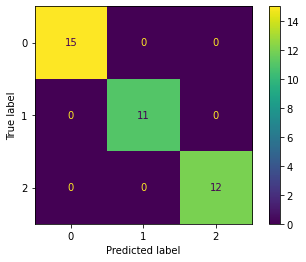

In [64]:
cm = confusion_matrix(test_z,z_predict,normalize=None,labels=knn.classes_)
print(cm)
cm_dis= ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn.classes_)
cm_dis.plot()
plt.show()